In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [37]:
df.shape

(440, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [39]:
X = df.drop('class', axis=1)
y = df['class']

In [40]:
y.unique()

array([2, 1, 3], dtype=int64)

In [41]:
y = y - 1 

In [42]:
y.unique()

array([1, 0, 2], dtype=int64)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

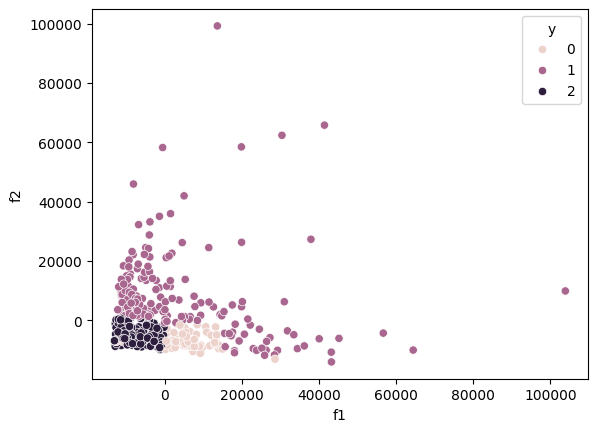

In [44]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = y

sns.scatterplot(data=df2, x='f1', y='f2', hue='y')
plt.show()

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_embedded = tsne.fit_transform(X)
X_embedded

array([[ 1.89860189e+00,  4.00640678e+00],
       [-5.99891853e+00,  8.86286640e+00],
       [-8.30582047e+00,  5.52977085e+00],
       [ 2.57231927e+00, -1.35799189e+01],
       [ 1.55946302e+01,  4.99962538e-01],
       [ 1.84836674e+00,  2.23473883e+00],
       [ 3.43554306e+00, -1.37122130e+00],
       [-5.79532719e+00,  6.18901968e+00],
       [-6.53378010e+00,  1.37353227e-01],
       [-4.22808266e+00,  1.75401497e+01],
       [-1.11434145e+01,  1.33503933e+01],
       [ 5.13383293e+00, -5.05571890e+00],
       [ 1.76472263e+01,  3.55369592e+00],
       [ 1.37271671e+01,  4.02927923e+00],
       [ 1.54215422e+01,  3.49881506e+00],
       [ 1.27024126e+00, -5.54173994e+00],
       [-8.94104767e+00,  1.26218014e+01],
       [-1.01917276e+01, -1.77591038e+00],
       [ 1.27255039e+01,  2.05419016e+00],
       [-4.83094358e+00,  4.09672737e+00],
       [ 1.13991928e+01, -1.50357103e+00],
       [-8.74339867e+00, -1.06274052e+01],
       [ 2.17068958e+01, -1.13901925e+00],
       [ 2.

<Figure size 640x480 with 0 Axes>

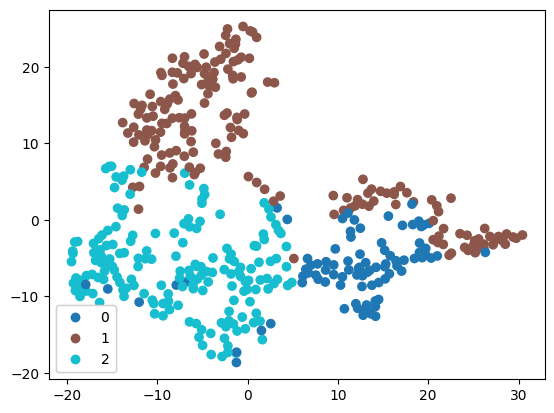

In [46]:
plt.set_cmap('tab10')

fig,ax = plt.subplots()
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:,1], c=y)

legend = ax.legend(*scatter.legend_elements(), loc= 'lower left')
ax.add_artist(legend)

plt.show()
plt.close()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, train_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [49]:
print('Train: ', X_train.shape, y_train.shape)
print('Val:', X_val.shape, y_val.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (39, 7) (39,)
Val: (5, 7) (5,)
Test:  (396, 7) (396,)


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [52]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
def create_baseline():
    model = Sequential([
                    Dense(32, activation="relu", kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)),
                    Dense(64, activation="relu", kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu", kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu", kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu", kernel_initializer='glorot_uniform'),
                    Dense(3, activation='softmax')])
    return model

In [55]:
model = create_baseline()

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,123 (82.51 KB)

 Trainable params: 21,123 (82.51 KB)

 Non-trainable params: 0 (0.00 B)

## 1. MINIBATCH GD :-

In [57]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [58]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step - accuracy: 0.3333 - loss: 1.0683 - val_accuracy: 0.6000 - val_loss: 1.0779
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3333 - loss: 1.0637 - val_accuracy: 0.6000 - val_loss: 1.0760
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3333 - loss: 1.0591 - val_accuracy: 0.6000 - val_loss: 1.0742
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4103 - loss: 1.0546 - val_accuracy: 0.6000 - val_loss: 1.0725
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4872 - loss: 1.0502 - val_accuracy: 0.6000 - val_loss: 1.0708
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5385 - loss: 1.0458 - val_accuracy: 0.6000 - val_loss: 1.0691
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5641 - loss: 1.0415 - val_accuracy: 0.6000 - val_loss: 1.0675
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5897 - loss: 1.0374 - val_accuracy: 0.6000 - val_loss: 1.0660

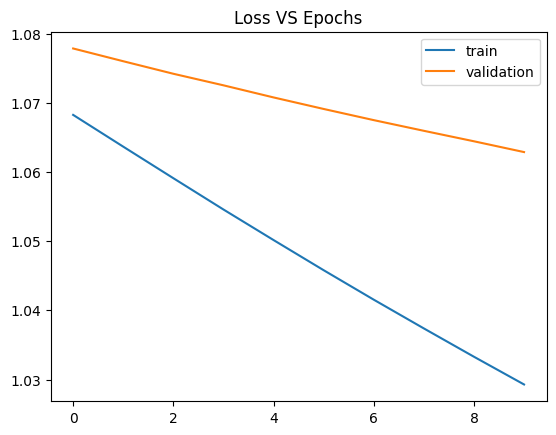

In [59]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")
plt.show()

In [60]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=200, batch_size=128, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5897 - loss: 1.0253 - val_accuracy: 0.6000 - val_loss: 1.0613
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.6154 - loss: 1.0214 - val_accuracy: 0.6000 - val_loss: 1.0598
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6154 - loss: 1.0175 - val_accuracy: 0.6000 - val_loss: 1.0582
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6154 - loss: 1.0136 - val_accuracy: 0.6000 - val_loss: 1.0567
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6923 - loss: 1.0097 - val_accuracy: 0.6000 - val_loss: 1.0552
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7436 - loss: 1.0059 - val_accuracy: 0.6000 - val_loss: 1.0537
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7436 - loss: 1.0021 - val_accuracy: 0.6000 - val_loss: 1.0522
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7179 - loss: 0.9984 - val_accuracy: 0.6000 - val_

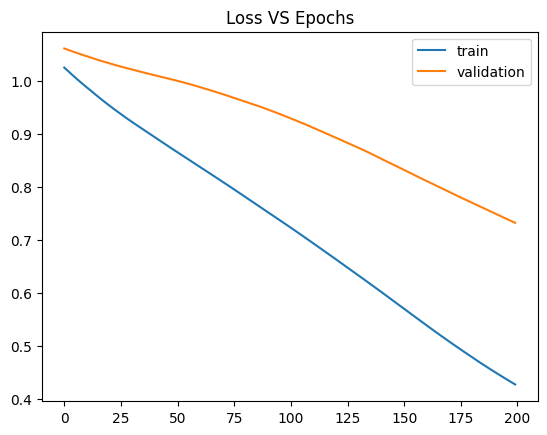

In [61]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")
plt.show()

## 2. GRADIENT DESCENT WITH MOMENTUM:-

In [62]:
model_gdm = create_baseline()

In [63]:
model_gdm.compile(
    optimizer = tf.keras.optimizers.SGD(momentum=0.9),
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
)

In [64]:
history = model_gdm.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size= 128, verbose=1
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0877 - val_loss: 1.0435
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1.0747 - val_loss: 1.0321
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 1.0507 - val_loss: 1.0179
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 1.0189 - val_loss: 1.0011
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.9828 - val_loss: 0.9832
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.9451 - val_loss: 0.9649
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.9070 - val_loss: 0.9460
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.8691 - val_loss: 0.9265
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.8311 - val_loss: 0.9074
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.7931 - val_loss: 0.8882
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.7556 - val_loss: 0.8685
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.7180 - val_loss:

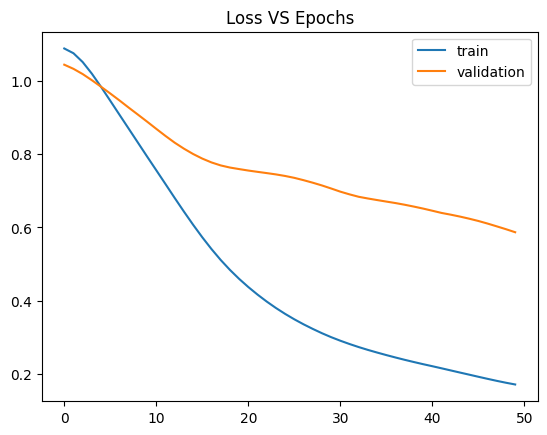

In [65]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train')
plt.plot(epochs , val_loss, label='validation')

plt.legend()
plt.title('Loss VS Epochs')
plt.show()

## 3. RMSProp:-

In [66]:
model_rms = create_baseline()

In [68]:
model_rms.compile(
    optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
)

In [69]:
history = model_rms.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 50, batch_size=128, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0541 - val_loss: 0.9720
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.9506 - val_loss: 0.9087
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.8655 - val_loss: 0.8549
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.7815 - val_loss: 0.7950
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.7014 - val_loss: 0.7429
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.6266 - val_loss: 0.6923
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.5578 - val_loss: 0.6518
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.4947 - val_loss: 0.6013
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.4333 - val_loss: 0.5684
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.3770 - val_loss: 0.5309
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3313 - val_loss: 0.5175
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2937 - val_loss:

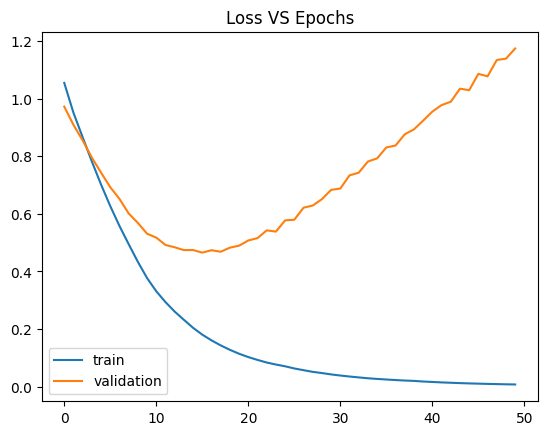

In [70]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")
plt.show()

## 4. ADAM OPTIMIZER:-

In [71]:
model_adam = create_baseline()

In [72]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999),
                loss = tf.keras.losses.SparseCategoricalCrossentropy())

In [73]:
history = model_adam.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=50, batch_size=128, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1229 - val_loss: 1.0757
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 1.0703 - val_loss: 1.0492
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.0268 - val_loss: 1.0275
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.9884 - val_loss: 1.0082
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.9551 - val_loss: 0.9908
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.9236 - val_loss: 0.9732
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.8943 - val_loss: 0.9549
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.8661 - val_loss: 0.9366
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.8379 - val_loss: 0.9193
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.8090 - val_loss: 0.9029
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.7797 - val_loss: 0.8863
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.7502 - val_loss:

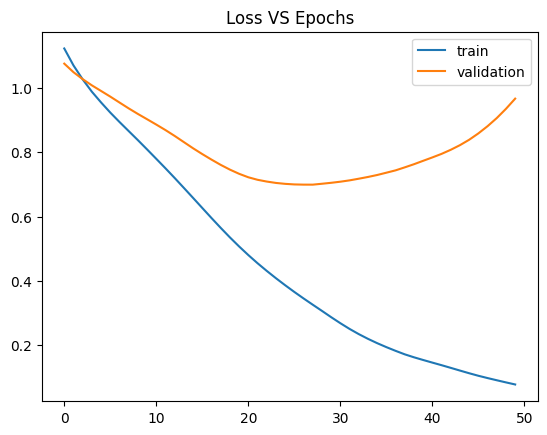

In [74]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")
plt.show()

## 5. LEARNING RATE DECAY:-

In [75]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [76]:
def scheduler(epoch, lr):
    r_0 = 0.01
    lr = (1/(1+r_0*epoch))*lr
    return lr

In [77]:
LRdecay = LearningRateScheduler(scheduler)

In [78]:
model_adam = create_baseline()

In [79]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.SparseCategoricalCrossentropy())

In [80]:
history = model_adam.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128,
                         callbacks=[LRdecay], verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1765 - val_loss: 1.1379 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.1170 - val_loss: 1.1114 - learning_rate: 9.9010e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1.0686 - val_loss: 1.0941 - learning_rate: 9.7069e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1.0320 - val_loss: 1.0789 - learning_rate: 9.4241e-04
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.0027 - val_loss: 1.0642 - learning_rate: 9.0617e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.9768 - val_loss: 1.0501 - learning_rate: 8.6302e-04
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.9526 - val_loss: 1.0374 - learning_rate: 8.1417e-04
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.9300 - val_loss: 1.0248 - learning_rate: 7.6090e-04
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.9083 - val_loss: 1.0122 - learning_rate: 7.0454e-04

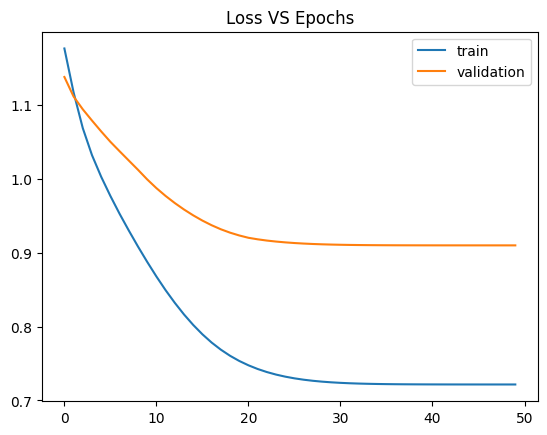

In [81]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")
plt.show()